### Ranked Information Coefficient
https://classroom.udacity.com/nanodegrees/nd880/parts/9a3a9589-7bc6-4694-81e0-8c3cb1aea251/modules/1976c245-f4ec-42bf-9611-180753a3a4df/lessons/a9a173b4-c01a-4919-b9b2-77f5b651b3be/concepts/cecd4d6e-4945-4d0f-b807-bdbc9e05bd72

In [1]:
# Imports
from quantopian.pipeline.data import Fundamentals
from quantopian.pipeline.data import morningstar as mstar
from quantopian.pipeline.factors import AverageDollarVolume
from quantopian.pipeline.factors.morningstar import MarketCap
from quantopian.pipeline.classifiers.morningstar import Sector
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline

from quantopian.pipeline.factors import SimpleMovingAverage
from quantopian.pipeline.factors import Returns
from zipline.pipeline.factors import DailyReturns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import time

from quantopian.pipeline.experimental import QTradableStocksUS

### Pipeline Construction using QTradableStocksUS as a scan

In [16]:
def make_pipeline():
    average_day_dv_200 = AverageDollarVolume(window_length = 200)
    market_cap = Fundamentals.market_cap.latest
    price = USEquityPricing.close.latest
    volume = USEquityPricing.volume.latest
    sector = Sector()
    daily_returns = DailyReturns(inputs=[USEquityPricing.close])
    
    # Ranked REturn
    returns = Returns(window_length = 252)
    ranked_returns = returns.rank()
    
    # New Factors
    # create a factor of 1 year returns, demeaned by sector, rank, zscore
    factor = (
    Returns(window_length=252).\
    demean(groupby = Sector()).\
    rank().\
    zscore()
    )
    
    # use the newly created factor as an input into SimpleMovingAverage, with the windowlength of 5
    factor_smoothed = (SimpleMovingAverage(inputs = [factor], window_length =5).\
        rank().\
        zscore()
                      )
    
    return Pipeline(
        columns = {
            'AverageDollarVolume200':average_day_dv_200,
            'MarketCap':market_cap,
            'Price':price,
            'Volume':volume,
            'Sector':sector,
            '1yrReturns':factor,
            '5dAvgReturns':factor_smoothed,
            'ranked_return': ranked_returns,
            '1dReturns':daily_returns,
        },
        screen = QTradableStocksUS()
    )

In [17]:
# Pipeline is run over this time range and outputs a dataframe indexed by asset name:
START_DATE = '2017'
END_DATE = '2019-08-01'

QTU_pipeline2 = run_pipeline(make_pipeline(), START_DATE, END_DATE, chunksize=252)

In [18]:
# lets see what stocks had the most gains ytd through july 31
leading_stocks = QTU_pipeline2.sort_values(by=['ranked_return'], ascending=False)
leading_stocks.filter(like='2019-08-01', axis = 0).head(25)

1dReturns  1yrReturns  \
2019-08-01 00:00:00+00:00 Equity(49607 [AXSM])  -0.031633    1.729191   
                          Equity(42749 [ENPH])   0.300231    1.723470   
                          Equity(32726 [EHTH])  -0.016682    1.722199   
                          Equity(50477 [IIPR])  -0.030914    1.713936   
                          Equity(50288 [TTD])   -0.006152    1.711393   
                          Equity(50411 [RARX])   0.004723    1.713300   
                          Equity(48628 [NVTA])  -0.011405    1.712665   
                          Equity(50735 [AYX])   -0.018810    1.706944   
                          Equity(44991 [NSTG])  -0.006066    1.705673   
                          Equity(50449 [INSG])  -0.003839    1.701859   
                          Equity(31341 [ZIOP])   0.051993    1.704402   
                          Equity(51314 [MDB])    0.008237    1.699317   
                          Equity(50758 [OKTA])  -0.008713    1.697410   
                          Equity(45758 [VCYT])  -0.043889    1.703130   
                          Equity(4549 [LSCC])    0.185890    1.691689   
                          Equity(45429 [FATE])  -0.020889    1.698045   
                          Equity(49460 [NVCR])  -0.002040    1.696774   
                          Equity(47321 [CDNA])  -0.043351    1.695503   
                          Equity(50077 [TWLO])  -0.006393    1.684062   
                          Equity(51832 [ZS])    -0.004607    1.682155   
                          Equity(51961 [SMAR])  -0.025185    1.679613   
                          Equity(45852 [TNDM])  -0.013667    1.688511   
                          Equity(49060 [SHOP])   0.011136    1.678341   
                          Equity(47779 [CYBR])  -0.012239    1.677070   
                          Equity(48254 [WK])    -0.021621    1.676435   

                                                5dAvgReturns  \
2019-08-01 00:00:00+00:00 Equity(49607 [AXSM])      1.729251   
                          Equity(42749 [ENPH])      1.718675   
                          Equity(32726 [EHTH])      1.722408   
                          Equity(50477 [IIPR])      1.714942   
                          Equity(50288 [TTD])       1.709965   
                          Equity(50411 [RARX])      1.714320   
                          Equity(48628 [NVTA])      1.712453   
                          Equity(50735 [AYX])       1.706232   
                          Equity(44991 [NSTG])      1.708098   
                          Equity(50449 [INSG])      1.703743   
                          Equity(31341 [ZIOP])      1.698144   
                          Equity(51314 [MDB])       1.695655   
                          Equity(50758 [OKTA])      1.690056   
                          Equity(45758 [VCYT])      1.705610   
                          Equity(4549 [LSCC])       1.678235   
                          Equity(45429 [FATE])      1.698766   
                          Equity(49460 [NVCR])      1.688190   
                          Equity(47321 [CDNA])      1.703121   
                          Equity(50077 [TWLO])      1.682590   
                          Equity(51832 [ZS])        1.677613   
                          Equity(51961 [SMAR])      1.685079   
                          Equity(45852 [TNDM])      1.695033   
                          Equity(49060 [SHOP])      1.652727   
                          Equity(47779 [CYBR])      1.673258   
                          Equity(48254 [WK])        1.679480   

                                                AverageDollarVolume200  \
2019-08-01 00:00:00+00:00 Equity(49607 [AXSM])            1.534594e+07   
                          Equity(42749 [ENPH])            2.654014e+07   
                          Equity(32726 [EHTH])            2.163884e+07   
                          Equity(50477 [IIPR])            2.431169e+07   
                          Equity(50288 [TTD])             1.989996e+08   
                          Equity(50411 [

### create individal dataframes

In [27]:
df_momentum = QTU_pipeline2[['1yrReturns', '5dAvgReturns']]
df_price = QTU_pipeline2[['Price']]
df_returns = QTU_pipeline2[['1dReturns']]

df_price = df_price.Price.unstack().fillna(0)
df_returns = df_returns['1dReturns'].unstack().fillna(0)

### Evaluate Factors
We'll go over some tools we can use to evaluate alpha factors, to do so we will use the alphalens library

### Import Alphalens

In [28]:
import alphalens as al

### Prepare data for use in alphalens

In [31]:
factor_names = df_momentum.columns
# print(f"The factor names are {factor_names}")

# Use a dictionary to store each dataframe, one for each factor and its associated forward returns
factor_data = {}
for factor_name in factor_names:
    print("Formatting factor data for: " + factor_name)
    # Get clean factor and forward returns for each factor
    # Choose single period returns (daily returns)
    factor_data[factor_name] = al.utils.get_clean_factor_and_forward_returns(
        factor=df_momentum[factor_name],
        prices=df_price,
        periods=[1])

Formatting factor data for: 1yrReturns
Dropped 1.3% entries from factor data: 1.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: 5dAvgReturns
Dropped 1.3% entries from factor data: 1.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


### Rank IC
The [factor_information_coefficient function in alphalens documentation is here.](https://quantopian.github.io/alphalens/alphalens.html#alphalens.performance.factor_information_coefficient)

also pasted below:
```
computs the Spearman Rank Correlaiton based Informaiton Coefficient (IC) between factor values in N period forward returns for each period in the factor index.

Parameters:
factor_data: pd.DataFrame - MultiIndex

A MultiIndex DataFrame indexed by date (level 0) and asset (level 1), containing the values for a single alpha factor, forward returns for each period, the factor quantile/bin that factor value belongs to, and (optionally) the group the asset belongs to. - See full explanation in utils.get_clean_factor_and_forward_returns

group_adjust : bool

Demean forward returns by group before computing IC.

by_group: bool

If True, compute period wise IC separately for each group.

Returns:

ic : pd.DataFrame

Spearman Rank correlation between factor and provided forward returns


### Quiz 1
Use alphalens to calculate the rank IC for each factor

In [33]:
ls_rank_ic = []

for i, factor_name in enumerate(factor_names):
    # Todo: use alphalens function "factor_information_coefficient" to calcualte the rank IC
    rank_ic = al.performance.factor_information_coefficient(factor_data[factor_name])
    rank_ic.columns = [factor_name]
    ls_rank_ic.append(rank_ic)

### Plot Rank IC

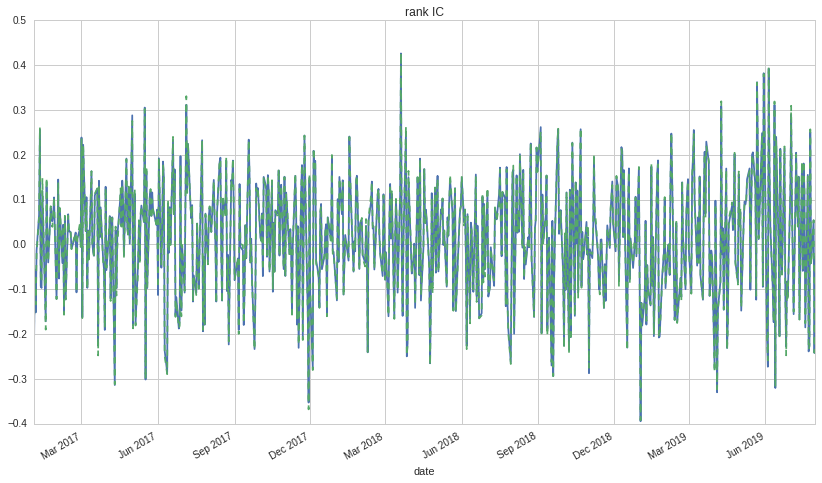

In [36]:
ls_rank_ic[0]['1yrReturns'].plot(title='rank IC')
ls_rank_ic[1]['5dAvgReturns'].plot(style='--');

### Quiz 2
what does it mean when the rank IC value is above the zero line?

### Answer 2
The rank IC is above zero when the correlation between the factor values an th forward returns is positive ( we ideally want ot find factors which the rank IC is more positive).